In [1]:
from chebpy2 import Chebfun2, Quasimatrix
import matplotlib.pyplot as plt
import chebpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def green(x,s):
    g = 0
    g = (x <= s) * (x * (1-s)) + (x > s) * (s * (1-x))
    return g

In [3]:
prefx = cp.core.settings.ChebPreferences()
prefy = cp.core.settings.ChebPreferences()
prefx.eps = 1e-6
prefy.eps = 1e-6

In [4]:
%%time
g = Chebfun2(green, domain = [0, 1, 0, 1], prefx = prefx, prefy = prefy)

CPU times: user 8.73 s, sys: 3.48 s, total: 12.2 s
Wall time: 12.2 s


In [5]:
%%time
g[0.5,0.5]

CPU times: user 2.68 s, sys: 6.22 ms, total: 2.69 s
Wall time: 2.77 s


array([0.25])

In [6]:
xx = np.linspace(0,1,2000)
yy = np.linspace(0,1,2000)
x, y = np.meshgrid(xx,yy)

In [7]:
%%time
out = g[x,y]

CPU times: user 7.64 s, sys: 1.51 s, total: 9.15 s
Wall time: 6.56 s


In [8]:
outtheory = green(x,y)
np.linalg.norm(out-outtheory)/np.linalg.norm(outtheory)

9.642534462399506e-05

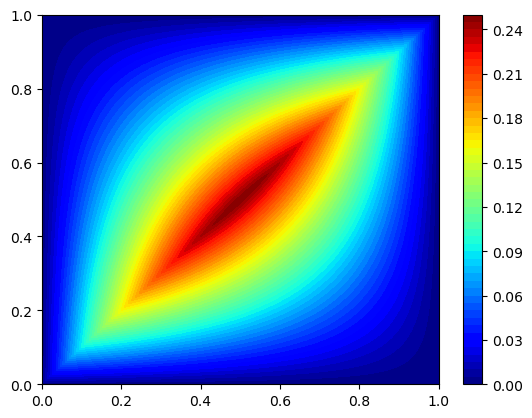

In [9]:
plt.contourf(x,y,out, 50, cmap = 'jet', vmin = 0, vmax = np.max(out))
plt.colorbar()

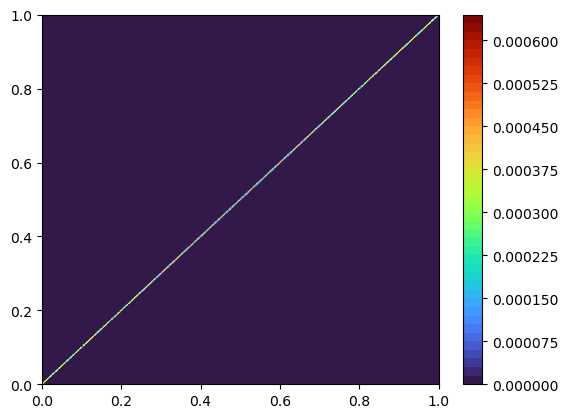

In [10]:
plt.contourf(x,y,np.abs(out-outtheory), 50, cmap = 'turbo', vmin = 0, vmax = np.max(np.abs(out-outtheory)))
plt.colorbar()